# SonarQube TS Analysis

In [91]:
import pandas as pd
import json
import requests
import dateutil.parser
import matplotlib.pyplot as plt
#pd.set_printoptions(max_rows=15) # this limit maximum numbers of rows

"switch on" inline graphic for the notebook:

In [92]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [93]:
METRICS_ALL = 'accessors,new_technical_debt,blocker_violations,conditions_to_cover,new_it_conditions_to_cover,new_conditions_to_cover,bugs,burned_budget,business_value,class_complexity_distribution,classes,code_smells,comment_lines,commented_out_code_lines,comment_lines_density,comment_lines_data,complexity,class_complexity,file_complexity,function_complexity,complexity_in_classes,complexity_in_functions,branch_coverage,new_it_branch_coverage,new_branch_coverage,conditions_by_line,confirmed_issues,coverage,new_it_coverage,coverage_line_hits_data,new_coverage,covered_conditions_by_line,critical_violations,last_commit_date,directories,duplicated_blocks,new_duplicated_blocks,duplicated_files,duplicated_lines,duplicated_lines_density,new_duplicated_lines,new_duplicated_lines_density,duplications_data,effort_to_reach_maintainability_rating_a,executable_lines_data,false_positive_issues,file_complexity_distribution,files,function_complexity_distribution,functions,generated_lines,generated_ncloc,info_violations,violations,it_conditions_to_cover,it_branch_coverage,it_conditions_by_line,it_coverage,it_coverage_line_hits_data,it_covered_conditions_by_line,it_line_coverage,it_lines_to_cover,it_uncovered_conditions,it_uncovered_lines,line_coverage,new_it_line_coverage,new_line_coverage,lines,ncloc,ncloc_language_distribution,new_lines,lines_to_cover,new_it_lines_to_cover,new_lines_to_cover,sqale_rating,new_maintainability_rating,major_violations,minor_violations,ncloc_data,new_blocker_violations,new_bugs,new_code_smells,new_critical_violations,new_info_violations,new_violations,new_major_violations,new_minor_violations,new_vulnerabilities,open_issues,overall_conditions_to_cover,new_overall_conditions_to_cover,overall_branch_coverage,new_overall_branch_coverage,overall_conditions_by_line,overall_coverage,overall_coverage_line_hits_data,new_overall_coverage,overall_covered_conditions_by_line,overall_line_coverage,new_overall_line_coverage'
METRICS_NOTNULL = 'blocker_violations,bugs,classes,code_smells,comment_lines,comment_lines_density,complexity,class_complexity,file_complexity,function_complexity,confirmed_issues,critical_violations,last_commit_date,directories,duplicated_blocks,duplicated_files,duplicated_lines,duplicated_lines_density,effort_to_reach_maintainability_rating_a,false_positive_issues,file_complexity_distribution,files,function_complexity_distribution,functions,info_violations,violations,lines,ncloc,ncloc_language_distribution,sqale_rating,major_violations,minor_violations,open_issues'
METRICS_NOTNULL_NOT_STRING = 'blocker_violations,bugs,classes,code_smells,comment_lines,comment_lines_density,complexity,class_complexity,file_complexity,function_complexity,confirmed_issues,critical_violations,last_commit_date,directories,duplicated_blocks,duplicated_files,duplicated_lines,duplicated_lines_density,effort_to_reach_maintainability_rating_a,false_positive_issues,files,functions,info_violations,violations,lines,ncloc,major_violations,minor_violations,open_issues'
METRICS = METRICS_NOTNULL_NOT_STRING
SONARQUBE_IP = 'http://195.251.210.166'
SONARQUBE_PORT = '9000'
GITHUB_OWNER = 'eclipse'
GITHUB_REPO = 'winery'
SONARQUBE_PROJECT_KEY = GITHUB_OWNER + ':' + GITHUB_REPO
SONARQUBE_API_URL = SONARQUBE_IP + ':' + SONARQUBE_PORT + '/api/'
SONARQUBE_RESOURCE = 'resource=' + SONARQUBE_PROJECT_KEY
METRICS_LIST = METRICS.split(',')

In [94]:
response = requests.get(SONARQUBE_API_URL + 'timemachine?' +SONARQUBE_RESOURCE + '&metrics=' + METRICS)

In [95]:
json_data = json.loads(response.text)

In [96]:
cells = json_data[0]['cells']#cells - metric values
cols = json_data[0]['cols']#cols - Metrcs

In [97]:
metrics_list_length = len(METRICS_LIST)
no_of_commits = len(cells)

In [98]:
def get_commit_dates():
    commit_dates = []
    for item in cells:
        date = dateutil.parser.parse(item.get('d'))
        commit_dates.append(date.strftime('%m/%d/%Y'))
    return commit_dates

In [99]:
commit_dates = get_commit_dates()

In [100]:
df = pd.DataFrame(index=commit_dates)
for metric_index in range(0, metrics_list_length):
    metric_series = []
    for item in cells:
        metric_series.append(item.get('v')[metric_index])
    df[METRICS_LIST[metric_index]] = pd.Series(metric_series, index=df.index).values

In [101]:
df_dif = df - df.shift(1)

In [102]:
#for metric in METRICS_LIST:
#    print((metric + ' chart - diff').upper())
#    df_dif[metric].plot()

BLOCKER_VIOLATIONS CHART


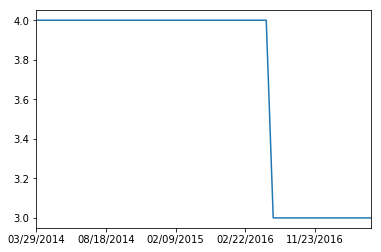

In [103]:
print('BLOCKER_VIOLATIONS CHART')
df['blocker_violations'].plot()

BUGS CHART


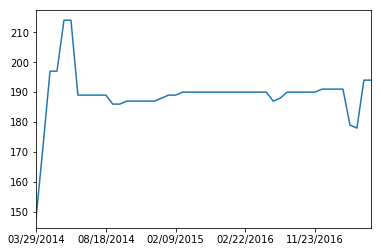

In [104]:
print('BUGS CHART')
df['bugs'].plot()

CLASSES CHART


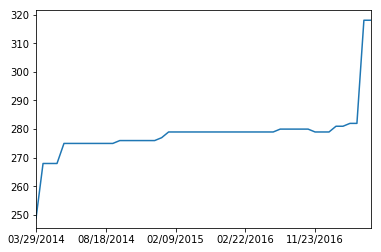

In [105]:
print('CLASSES CHART')
df['classes'].plot()

CODE_SMELLS CHART


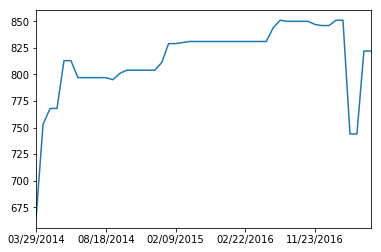

In [106]:
print('CODE_SMELLS CHART')
df['code_smells'].plot()

COMMENT_LINES CHART


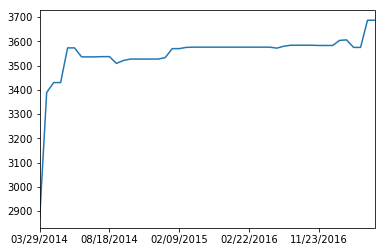

In [107]:
print('COMMENT_LINES CHART')
df['comment_lines'].plot()

COMMENT_LINES_DENSITY CHART


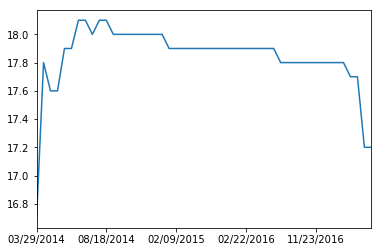

In [108]:
print('COMMENT_LINES_DENSITY CHART')
df['comment_lines_density'].plot()

COMPLEXITY CHART


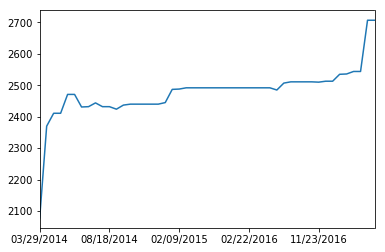

In [109]:
print('COMPLEXITY CHART')
df['complexity'].plot()

CLASS_COMPLEXITY CHART


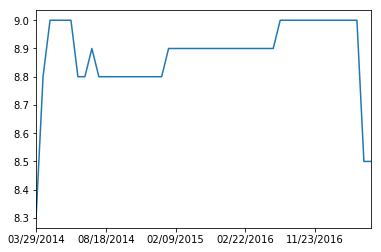

In [110]:
print('CLASS_COMPLEXITY CHART')
df['class_complexity'].plot()

FILE_COMPLEXITY CHART


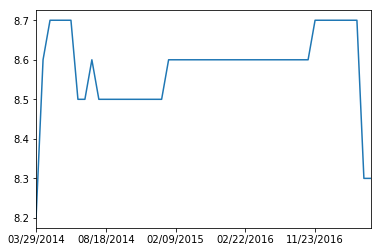

In [111]:
print('FILE_COMPLEXITY CHART')
df['file_complexity'].plot()

FUNCTION_COMPLEXITY CHART


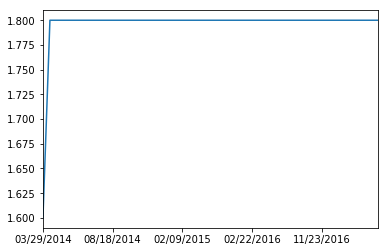

In [112]:
print('FUNCTION_COMPLEXITY CHART')
df['function_complexity'].plot()

CONFIRMED_ISSUES CHART


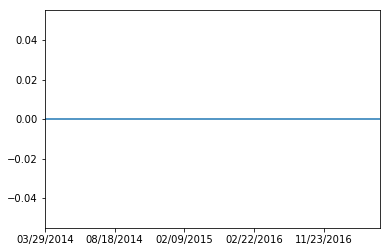

In [113]:
print('CONFIRMED_ISSUES CHART')
df['confirmed_issues'].plot()

CRITICAL_VIOLATIONS CHART


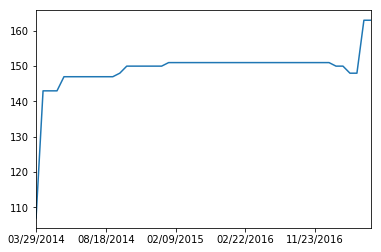

In [114]:
print('CRITICAL_VIOLATIONS CHART')
df['critical_violations'].plot()

LAST_COMMIT_DATE CHART


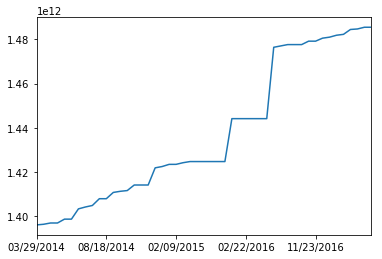

In [115]:
print('LAST_COMMIT_DATE CHART')
df['last_commit_date'].plot()

DIRECTORIES CHART


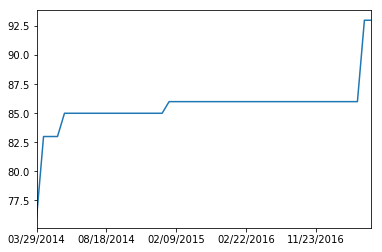

In [116]:
print('DIRECTORIES CHART')
df['directories'].plot()

DUPLICATED_BLOCKS CHART


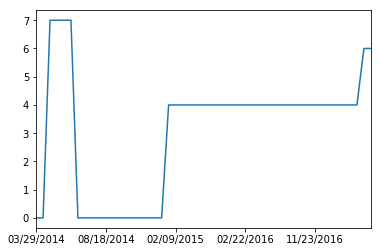

In [117]:
print('DUPLICATED_BLOCKS CHART')
df['duplicated_blocks'].plot()

DUPLICATED_FILES CHART


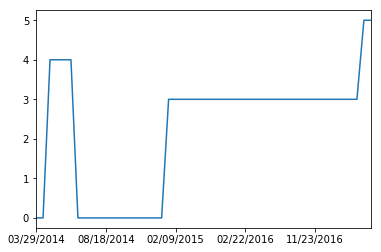

In [118]:
print('DUPLICATED_FILES CHART')
df['duplicated_files'].plot()

DUPLICATED_LINES CHART


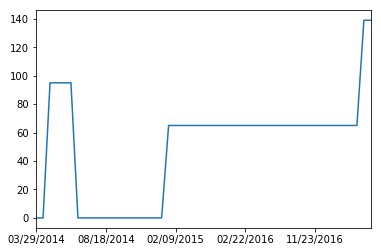

In [119]:
print('DUPLICATED_LINES CHART')
df['duplicated_lines'].plot()

DUPLICATED_LINES_DENSITY CHART


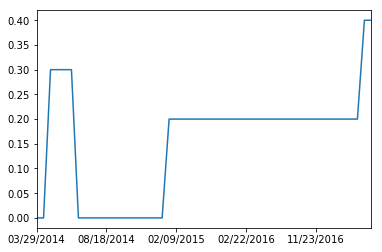

In [120]:
print('DUPLICATED_LINES_DENSITY CHART')
df['duplicated_lines_density'].plot()

EFFORT_TO_REACH_MAINTAINABILITY_RATING_A CHART


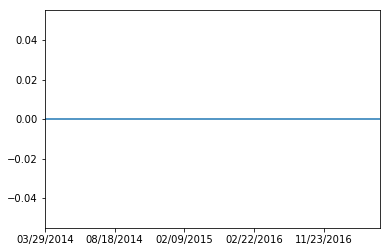

In [121]:
print('EFFORT_TO_REACH_MAINTAINABILITY_RATING_A CHART')
df['effort_to_reach_maintainability_rating_a'].plot()

FALSE_POSITIVE_ISSUES CHART


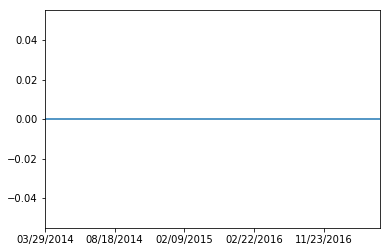

In [122]:
print('FALSE_POSITIVE_ISSUES CHART')
df['false_positive_issues'].plot()

FILES CHART


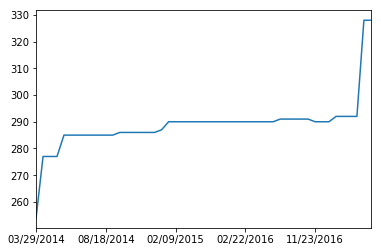

In [123]:
print('FILES CHART')
df['files'].plot()

FUNCTIONS CHART


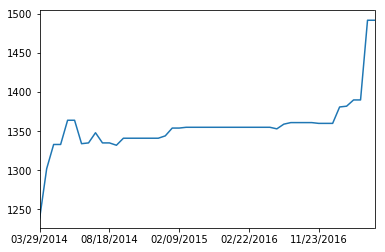

In [124]:
print('FUNCTIONS CHART')
df['functions'].plot()

INFO_VIOLATIONS CHART


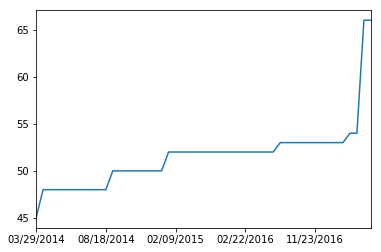

In [125]:
print('INFO_VIOLATIONS CHART')
df['info_violations'].plot()

VIOLATIONS CHART


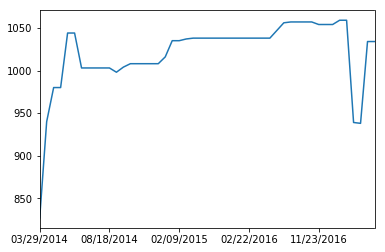

In [126]:
print('VIOLATIONS CHART')
df['violations'].plot()

LINES CHART


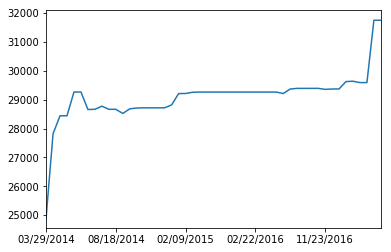

In [127]:
print('LINES CHART')
df['lines'].plot()

NCLOC CHART


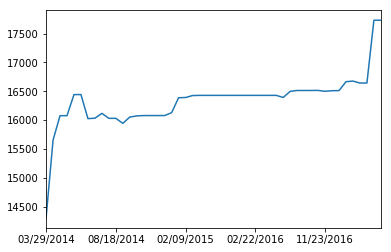

In [128]:
print('NCLOC CHART')
df['ncloc'].plot()

MAJOR_VIOLATIONS CHART


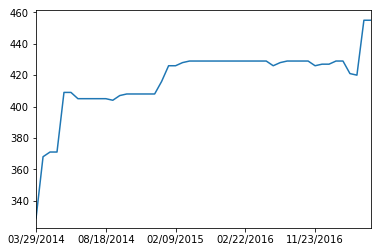

In [129]:
print('MAJOR_VIOLATIONS CHART')
df['major_violations'].plot()

MINOR_VIOLATIONS CHART


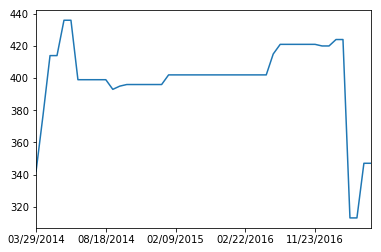

In [130]:
print('MINOR_VIOLATIONS CHART')
df['minor_violations'].plot()

OPEN_ISSUES CHART


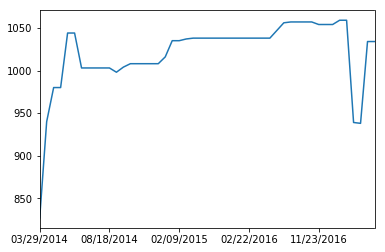

In [131]:
print('OPEN_ISSUES CHART')
df['open_issues'].plot()

BLOCKER_VIOLATIONS CHART- DIFF


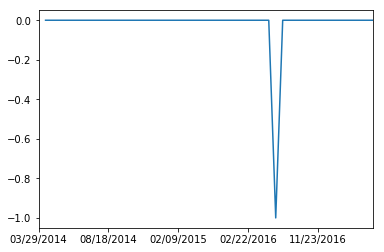

In [132]:
print('BLOCKER_VIOLATIONS CHART- DIFF')
df_dif['blocker_violations'].plot()

BUGS CHART- DIFF


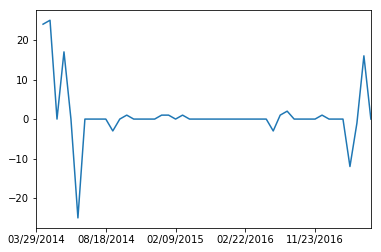

In [133]:
print('BUGS CHART- DIFF')
df_dif['bugs'].plot()

CLASSES CHART- DIFF


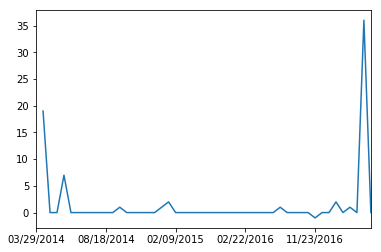

In [134]:
print('CLASSES CHART- DIFF')
df_dif['classes'].plot()

CODE_SMELLS CHART- DIFF


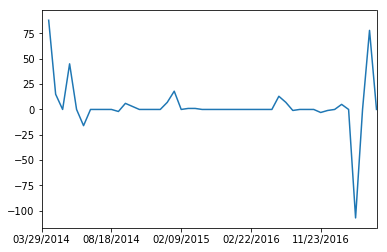

In [135]:
print('CODE_SMELLS CHART- DIFF')
df_dif['code_smells'].plot()

COMMENT_LINES CHART- DIFF


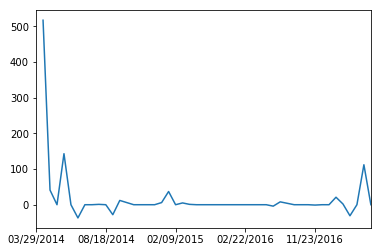

In [136]:
print('COMMENT_LINES CHART- DIFF')
df_dif['comment_lines'].plot()

COMMENT_LINES_DENSITY CHART- DIFF


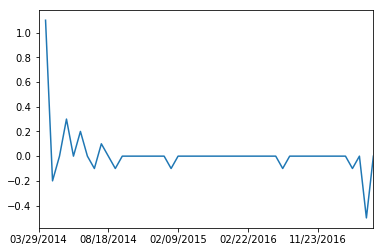

In [137]:
print('COMMENT_LINES_DENSITY CHART- DIFF')
df_dif['comment_lines_density'].plot()

COMPLEXITY CHART- DIFF


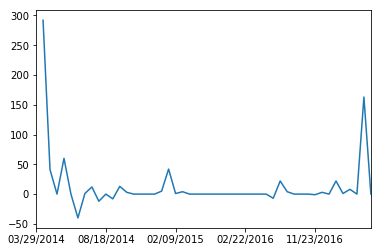

In [138]:
print('COMPLEXITY CHART- DIFF')
df_dif['complexity'].plot()

CLASS_COMPLEXITY CHART- DIFF


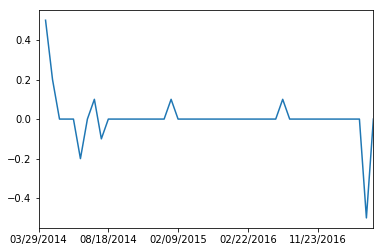

In [139]:
print('CLASS_COMPLEXITY CHART- DIFF')
df_dif['class_complexity'].plot()

FILE_COMPLEXITY CHART- DIFF


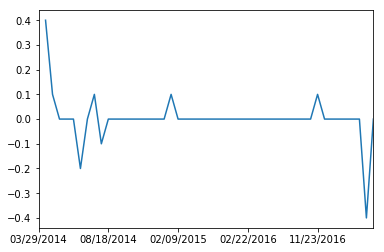

In [140]:
print('FILE_COMPLEXITY CHART- DIFF')
df_dif['file_complexity'].plot()

FUNCTION_COMPLEXITY CHART- DIFF


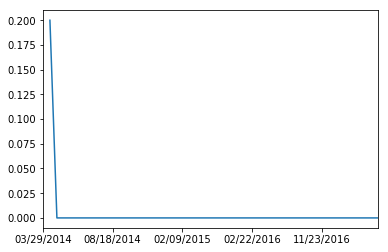

In [141]:
print('FUNCTION_COMPLEXITY CHART- DIFF')
df_dif['function_complexity'].plot()

CONFIRMED_ISSUES CHART- DIFF


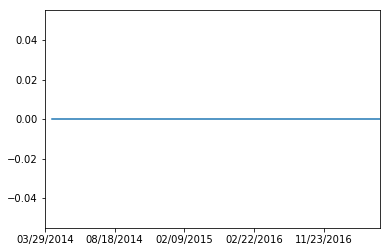

In [142]:
print('CONFIRMED_ISSUES CHART- DIFF')
df_dif['confirmed_issues'].plot()

CRITICAL_VIOLATIONS CHART- DIFF


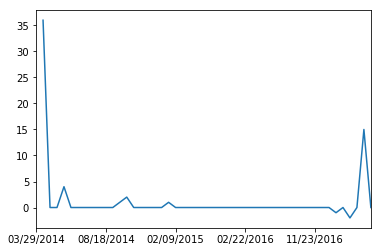

In [143]:
print('CRITICAL_VIOLATIONS CHART- DIFF')
df_dif['critical_violations'].plot()

LAST_COMMIT_DATE CHART- DIFF


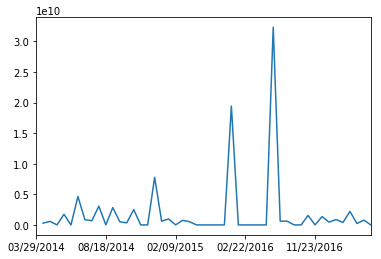

In [144]:
print('LAST_COMMIT_DATE CHART- DIFF')
df_dif['last_commit_date'].plot()

DIRECTORIES CHART- DIFF


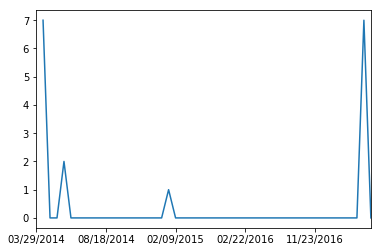

In [145]:
print('DIRECTORIES CHART- DIFF')
df_dif['directories'].plot()

DUPLICATED_BLOCKS CHART- DIFF


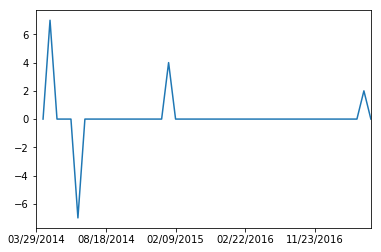

In [146]:
print('DUPLICATED_BLOCKS CHART- DIFF')
df_dif['duplicated_blocks'].plot()

DUPLICATED_FILES CHART- DIFF


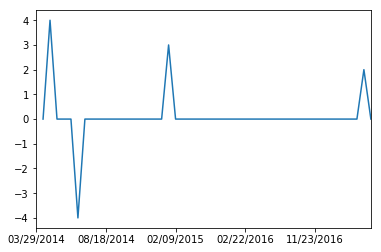

In [147]:
print('DUPLICATED_FILES CHART- DIFF')
df_dif['duplicated_files'].plot()

DUPLICATED_LINES CHART- DIFF


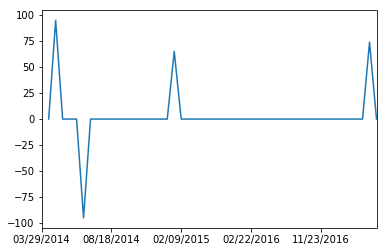

In [148]:
print('DUPLICATED_LINES CHART- DIFF')
df_dif['duplicated_lines'].plot()

DUPLICATED_LINES_DENSITY CHART- DIFF


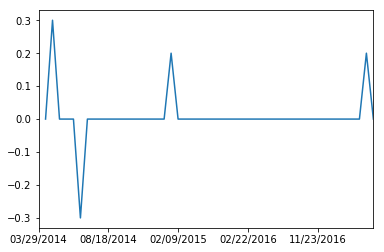

In [149]:
print('DUPLICATED_LINES_DENSITY CHART- DIFF')
df_dif['duplicated_lines_density'].plot()

EFFORT_TO_REACH_MAINTAINABILITY_RATING_A CHART- DIFF


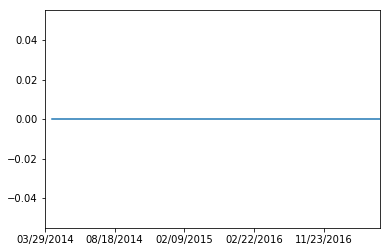

In [150]:
print('EFFORT_TO_REACH_MAINTAINABILITY_RATING_A CHART- DIFF')
df_dif['effort_to_reach_maintainability_rating_a'].plot()

FALSE_POSITIVE_ISSUES CHART- DIFF


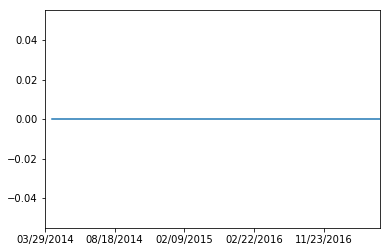

In [151]:
print('FALSE_POSITIVE_ISSUES CHART- DIFF')
df_dif['false_positive_issues'].plot()

FILES CHART- DIFF


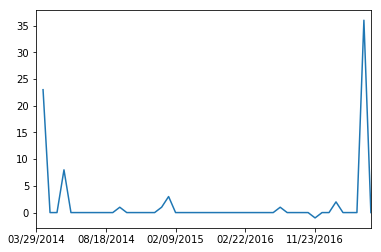

In [152]:
print('FILES CHART- DIFF')
df_dif['files'].plot()

FUNCTIONS CHART- DIFF


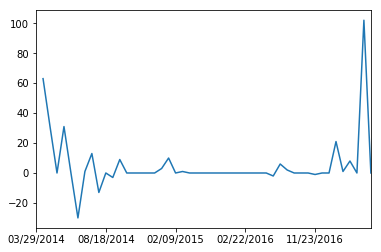

In [153]:
print('FUNCTIONS CHART- DIFF')
df_dif['functions'].plot()

INFO_VIOLATIONS CHART- DIFF


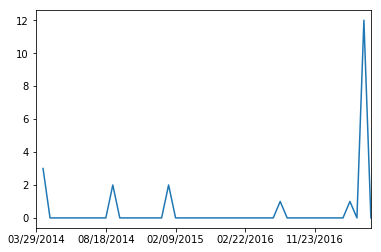

In [154]:
print('INFO_VIOLATIONS CHART- DIFF')
df_dif['info_violations'].plot()

VIOLATIONS CHART- DIFF


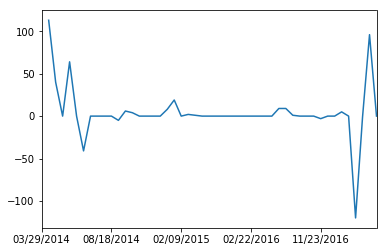

In [155]:
print('VIOLATIONS CHART- DIFF')
df_dif['violations'].plot()

LINES CHART- DIFF


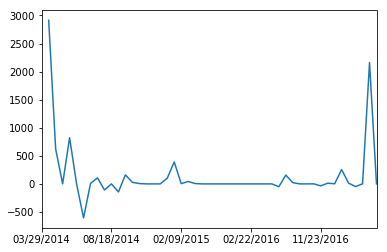

In [156]:
print('LINES CHART- DIFF')
df_dif['lines'].plot()

NCLOC CHART- DIFF


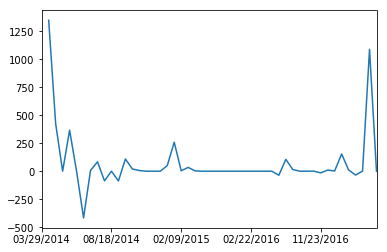

In [157]:
print('NCLOC CHART- DIFF')
df_dif['ncloc'].plot()

MAJOR_VIOLATIONS CHART- DIFF


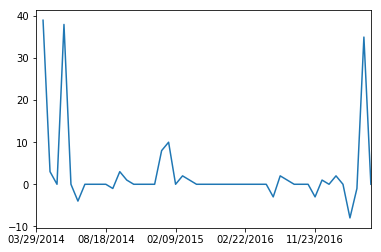

In [158]:
print('MAJOR_VIOLATIONS CHART- DIFF')
df_dif['major_violations'].plot()

MINOR_VIOLATIONS CHART- DIFF


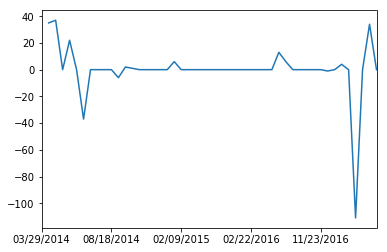

In [159]:
print('MINOR_VIOLATIONS CHART- DIFF')
df_dif['minor_violations'].plot()

OPEN_ISSUES CHART- DIFF


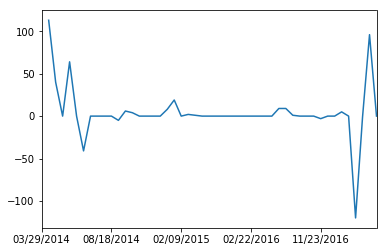

In [160]:
print('OPEN_ISSUES CHART- DIFF')
df_dif['open_issues'].plot()